In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

sys.path.append(os.path.join(os.getcwd(), 'scripts'))
from pp_check_config import PLAYERS_2011, PLAYERS_2016, OUTPUT_PATH, DATA_PATH

from pp_check_functions import *

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


note- all functions are drawn from the pp_check_functions.py script

### Loading the data 

In [1]:
sum_2016[sum_2016['parameter'].str.contains('beta_serve_speed_surprise_int_player\[5]', regex=True, na=False)]#RetryClaude can make mistakes. Please double-check responses.


NameError: name 'sum_2016' is not defined

In [3]:
csv_2011, csv_2016, sum_2011, sum_2016,stan_2011,stan_2016=get_data()


Script location: /Users/levisolomyak/Documents/GitHub/ffff/tennis_RL_Bayes/scripts/python_version/scripts/pp_check_functions.py
Base path: /Users/levisolomyak/Documents/GitHub/ffff/tennis_RL_Bayes
Looking for files in: /Users/levisolomyak/Documents/GitHub/ffff/tennis_RL_Bayes/data/processed
Files that exist: [PosixPath('/Users/levisolomyak/Documents/GitHub/ffff/tennis_RL_Bayes/data/processed/data_2011_wDrun.csv'), PosixPath('/Users/levisolomyak/Documents/GitHub/ffff/tennis_RL_Bayes/data/processed/csv_2016.parquet'), PosixPath('/Users/levisolomyak/Documents/GitHub/ffff/tennis_RL_Bayes/data/processed/data_2016_wDrun.csv'), PosixPath('/Users/levisolomyak/Documents/GitHub/ffff/tennis_RL_Bayes/data/processed/full_summary_2016.parquet'), PosixPath('/Users/levisolomyak/Documents/GitHub/ffff/tennis_RL_Bayes/data/processed/data_2016_2022_stan_2016_uniform_effort.json'), PosixPath('/Users/levisolomyak/Documents/GitHub/ffff/tennis_RL_Bayes/data/processed/csv_2011.parquet'), PosixPath('/Users/levi

#### Next we add the per-trial cumulative surprise fits from the model 

In [4]:
# next we add cumulative surprise 
csv_2011 = add_cumulative(sum_2011,csv_2011)
csv_2016= add_cumulative(sum_2016,csv_2016)

We also need to extract all the parameters from the summary csv's - the full samples are way too big to analyze here

0.6083983151221557 0.04957018792776366


/Users/levisolomyak/Documents/GitHub/ffff/tennis_RL_Bayes/scripts/python_version/scripts/pp_check_functions.py:192: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_data.groupby("bins")


0.6168809723306525 0.040583099118878786


/Users/levisolomyak/Documents/GitHub/ffff/tennis_RL_Bayes/scripts/python_version/scripts/pp_check_functions.py:192: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_data.groupby("bins")


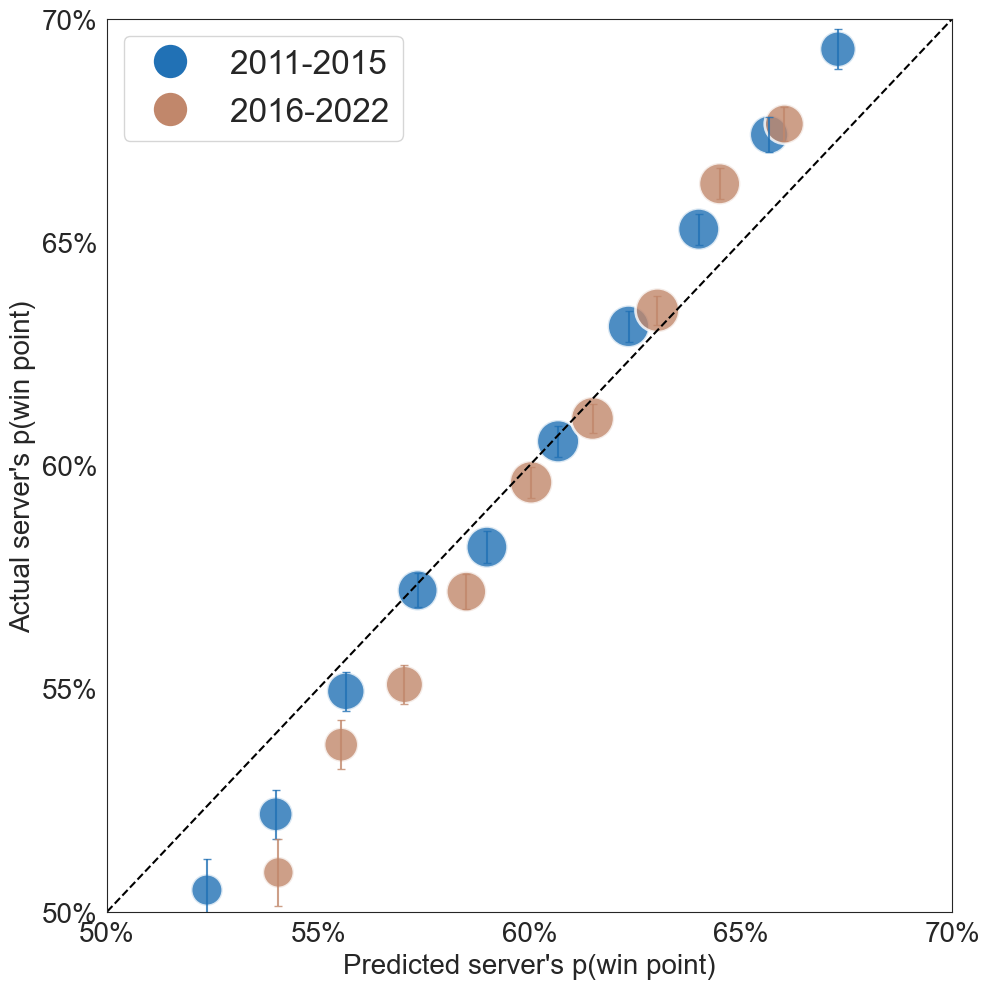

In [ ]:
def run_post_point(sum,data,stan):
   # data = add_cumulative(sum,data)

    point_params=extract_point_params(sum)
    data['win_prob'] = compute_win_prob(data, point_params, stan)
    point_cal_data=create_point_calibration_data(data,n_bins=20)
    return point_cal_data

point_cal_data_2011=run_post_point(sum_2011,csv_2011,stan_2011)
point_cal_data_2016=run_post_point(sum_2016,csv_2016,stan_2016)

point_cal_data_2011['period'] = '2011-2015'
point_cal_data_2016['period'] = '2016-2022'
combined_data = pd.concat([point_cal_data_2011,point_cal_data_2016])
create_combined_point_plot(combined_data)

extracted parameters succesfully
made predictions
prepare data for plot


/var/folders/1p/4_68w8v544z2q0kl06zf9dwc0000gn/T/ipykernel_13235/1290287765.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby('bins')


extracted parameters succesfully
made predictions


/var/folders/1p/4_68w8v544z2q0kl06zf9dwc0000gn/T/ipykernel_13235/1290287765.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby('bins')


prepare data for plot


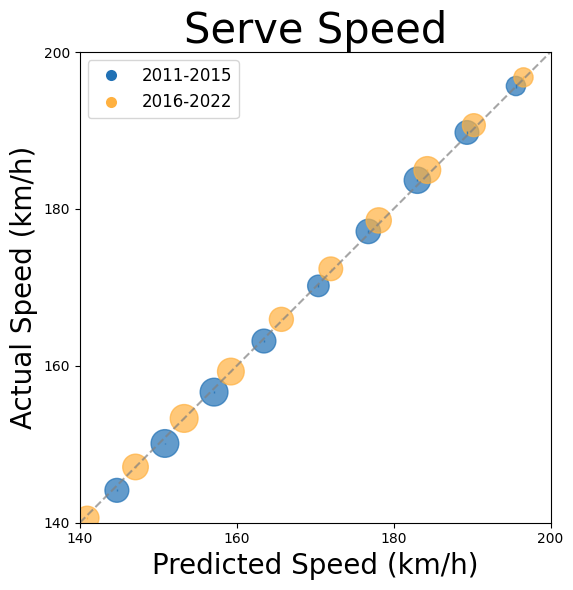

In [34]:
# start with group level 
def run_post_serve(sum,data,stan):
    serve_params= extract_serve_params(sum)
    print('extracted parameters succesfully')
    predictions = compute_serve_speed(data, serve_params, stan)
    print('made predictions')

    point_cal_data = create_serve_calibration_data(predictions['speeds'], data.loc[predictions['indices'],'Speed_KMH'], n_bins=20)
    print('prepare data for plot')

    return point_cal_data, predictions
cal_2011, predictions_2011=run_post_serve(sum_2011,csv_2011,stan_2011)
cal_2016, predictions_2016=run_post_serve(sum_2016,csv_2016,stan_2016)
overlay_plot = create_overlay_plot(cal_2011, cal_2016, "2011-2015", "2016-2022")

### Now evaluating player specific plots

In [40]:
predictions_2016=predictions_2015

In [48]:
from pathlib import Path
output_dir=Path(os.getcwd())
Path(output_dir.parent.parent / 'vis_python')

PosixPath('/Users/levisolomyak/Documents/GitHub/ffff/tennis_RL_Bayes/vis_python')

plots ar saved but can be adjusted to false
Novak Djokovic: 6626 valid serves
Serena Williams: 2838 valid serves
Rafael Nadal: 4517 valid serves
Roger Federer: 5712 valid serves
Novak Djokovic: 7456 valid serves
Serena Williams: 3532 valid serves
Rafael Nadal: 5543 valid serves
Roger Federer: 5275 valid serves
Created calibration data for 8 player-dataset combinations


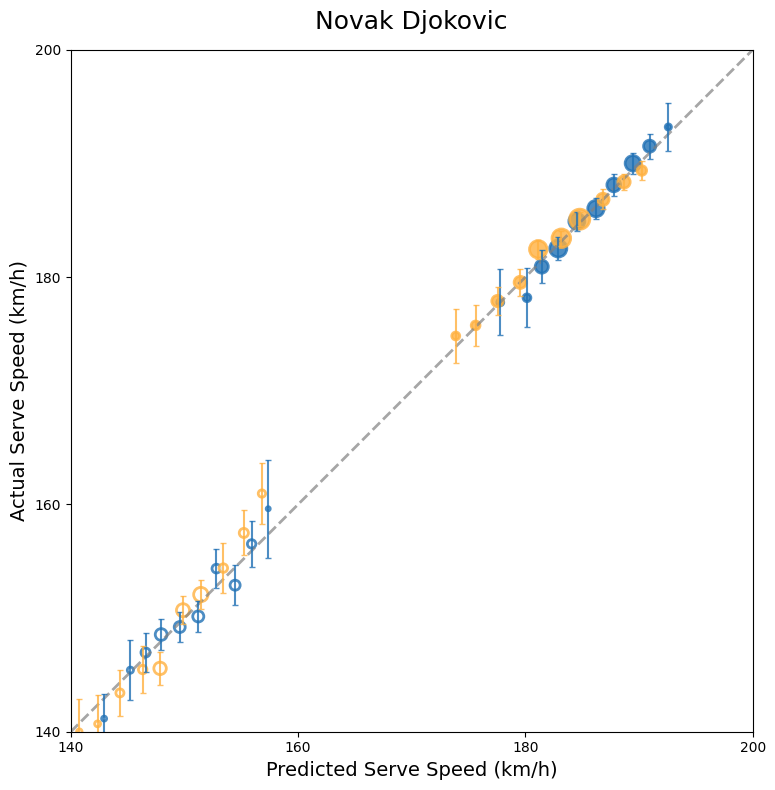

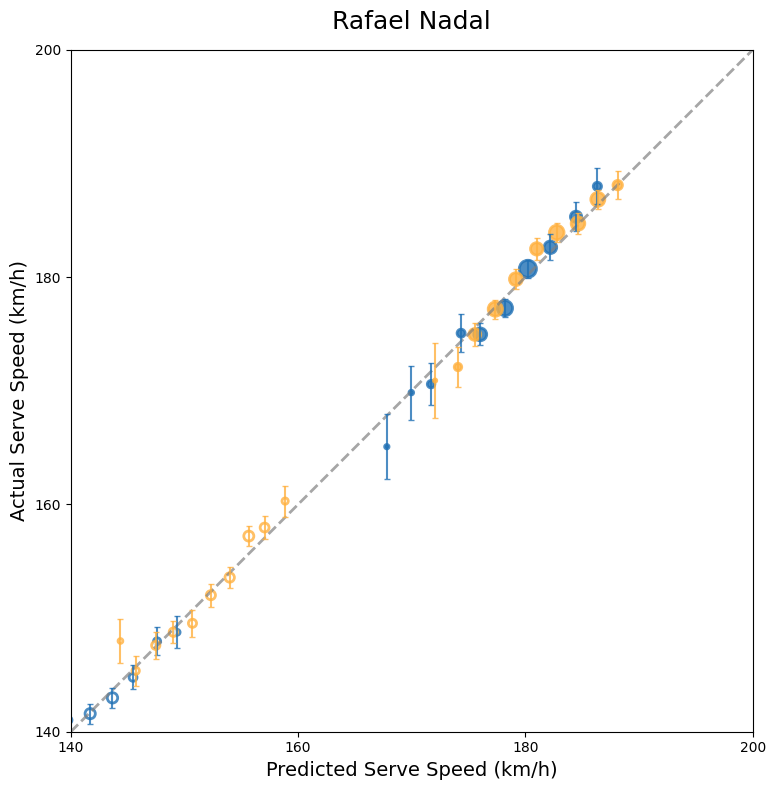

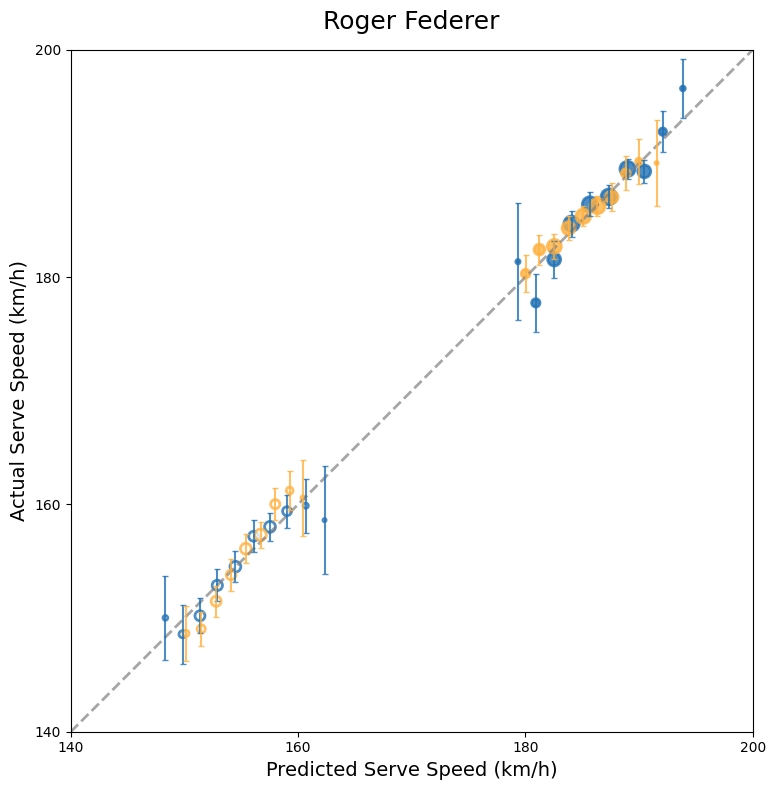

In [50]:

# Create player calibration data
player_cal_all = []
players_2016 = {
    "Novak Djokovic":1,
    "Serena Williams":2,
    "Rafael Nadal":4,
    "Roger Federer":6
}
players_2011 = {
    "Novak Djokovic":1,
    "Serena Williams":4,

    "Rafael Nadal":8,
    "Roger Federer":3
}
save_plots=True
output_dir=Path(os.getcwd())
Path(output_dir.parent.parent / 'vis_python')
print('plots ar saved but can be adjusted to false')
for player_name, player_id in players_2011.items():
    
    cal_data = create_player_calibration_data(
        csv_2011, predictions_2011, player_id, player_name
    )
    if cal_data is not None:
        cal_data['dataset'] = '2011-2015'
        player_cal_all.append(cal_data)



for player_name, player_id in players_2016.items():
    
    cal_data = create_player_calibration_data(
        csv_2016, predictions_2016, player_id, player_name
    )
    if cal_data is not None:
        cal_data['dataset'] = '2016-2022'
        player_cal_all.append(cal_data)
# Combine all player calibration data
if player_cal_all:
    player_df = pd.concat(player_cal_all, ignore_index=True)
    print(f"Created calibration data for {len(player_cal_all)} player-dataset combinations")
    
    # Create player plots
    for player_name in ['Novak Djokovic', 'Rafael Nadal', 'Roger Federer']:
        fig = create_player_calibration_plot(player_df, player_name)
        if fig is not None:
            if save_plots:
                safe_name = player_name.replace(' ', '_').lower()
                fig.savefig(f"{output_dir}/player_{safe_name}.png", dpi=300, bbox_inches='tight')
            plt.show()
else:
    print("No player calibration data created")
